In [13]:
%matplotlib inline

In [14]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [34]:
config = json.load(open("particles.cfg"))

In [16]:
def asympRead(particle, cutoff): 
    return pd.concat([pd.read_csv("output/{0}/asymp-{1:d}.dat".format(particle, cutscale), header=None, names=["E", str(cutscale)], index_col=0)\
                      for cutscale in cutoff], axis=1)\
          ,pd.read_csv("output/{}/minE.dat".format(particle), header=None, names=["cutscale", "E"], index_col=0)

In [17]:
def plotParticle(ax, pname):
    data, peaks = asympRead(pname, config[pname]["cutscales"])
    plotData = data.loc[(data.index > -np.inf) & (data.index < np.inf)].plot(marker="o", ls="", logy=True, ax=ax, title=pname+"("+str(config[pname]["eq"]["E"])+")")
    for line in ax.get_lines():
        color = line._get_markerfacecolor()
        pos = line.get_label()
        plotData.axvline(peaks.loc[int(pos)][0], ls="--", color=color)

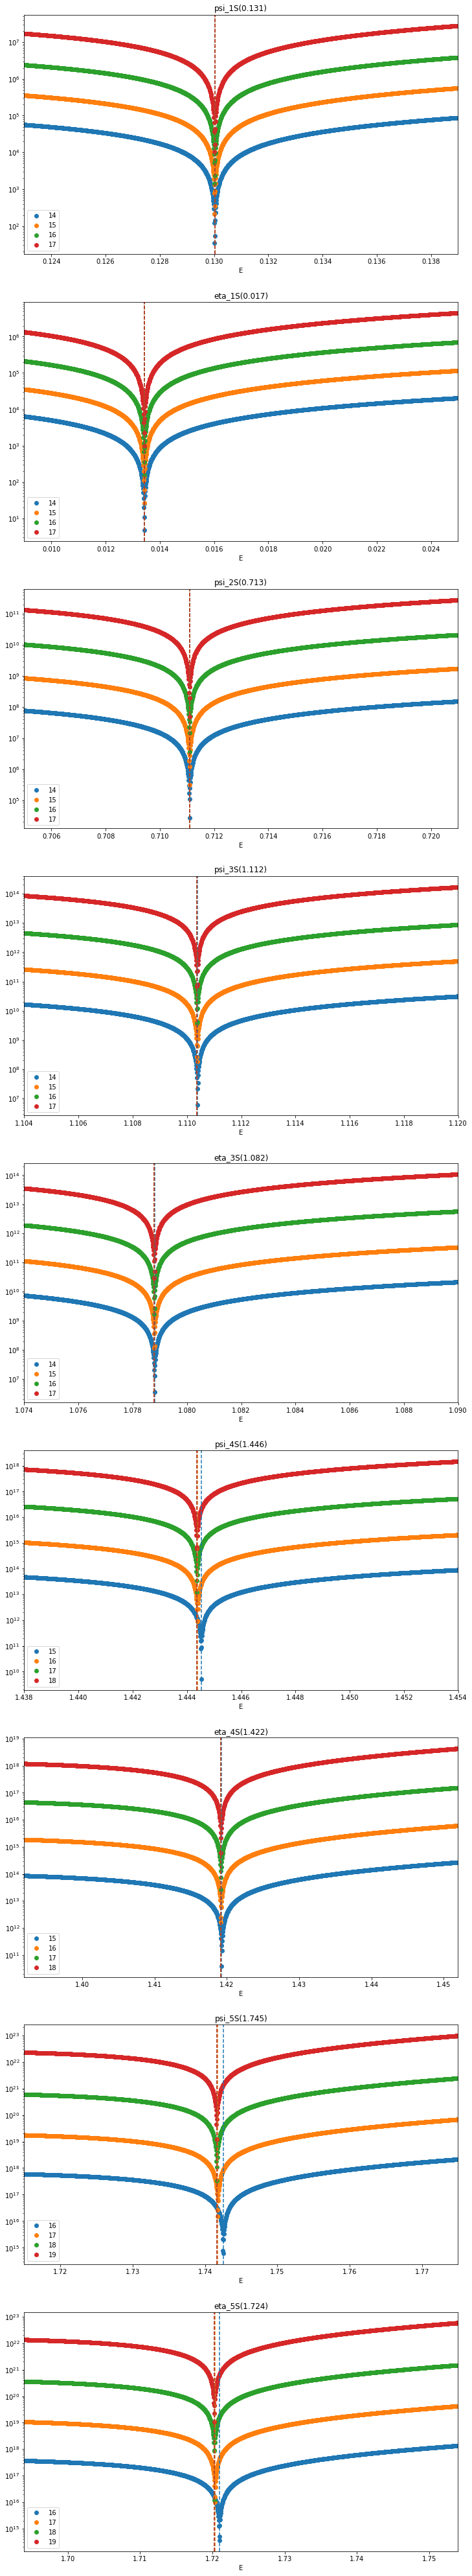

In [35]:
fig, axes = plt.subplots(len(config), figsize=(plt.rcParams["figure.figsize"][0], plt.rcParams["figure.figsize"][1]*len(config)))
for i,pname in enumerate(config.keys()):
    plotParticle(axes[i], pname)

In [36]:
for pname in config.keys():
    peaks = pd.read_csv("output/{}/minE.dat".format(pname), header=None, names=["cutscale", "E"], index_col=0)
    print("{}({})".format(pname,peaks.iloc[-1][0]))
    print("peaks - peaks[-1]")
    print(peaks - peaks.iloc[-1])
    print("\n")
    print("peaks[i]-peaks[i-1]")
    print(peaks.diff())
    print("\n---\n")

psi_1S(0.13002385972906)
peaks - peaks[-1]
                     E
cutscale              
14       -1.089700e-10
15       -4.660022e-12
16        9.300061e-13
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
15        1.043100e-10
16        5.590028e-12
17       -9.300061e-13

---

eta_1S(0.013423036888241998)
peaks - peaks[-1]
                     E
cutscale              
14       -3.129250e-10
15       -7.450600e-11
16        1.490100e-11
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
15        2.384190e-10
16        8.940700e-11
17       -1.490100e-11

---

psi_2S(0.7110919998958699)
peaks - peaks[-1]
                     E
cutscale              
14        2.586097e-08
15        1.065430e-09
16        5.215006e-11
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
15       -2.479554e-08
16   